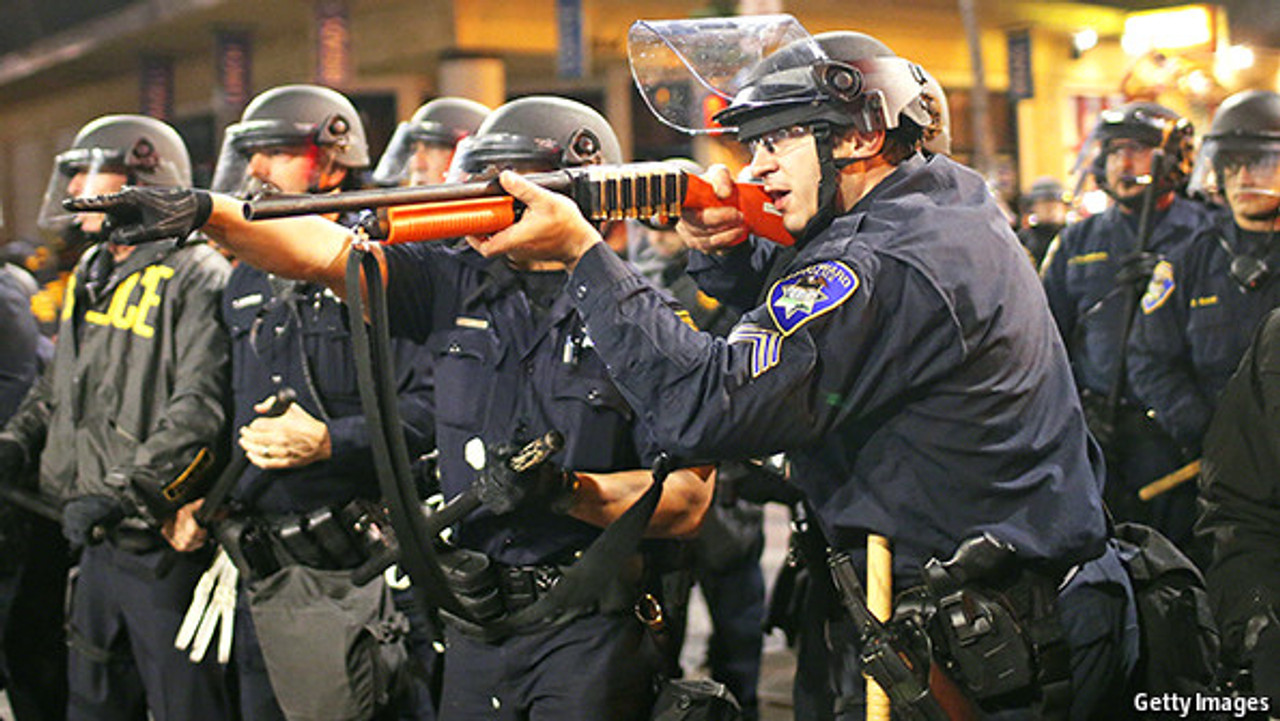

# **Dataset Introduction:**

It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect.

In this kernel we try to explore all the aspects of shooting. 

# Upvote if You like my Work



<a id="99"></a>

# [Table Of Contents](#99)

1. [Importing Libraries and Dataset](#1)

2. [Dataset Exploration](#2)

    2.1 [Missing Value Check](#2.1)
    
    2.2 [Statistical Data](#2.2)
   
    2.3 [Unique Values in Columns](#2.3)
   
    2.4 [Duplicate Name](#2.4)   

3. [Curious Case of TK TK](#3)

4. [Neutralizing a suspect](#4)

5. [Timeline of Shooting Incident by US Police](#5)

6. [Weapons Used](#6)

    6.1 [Wordcloud of Weapons used](#6.1)

7. [Male Female Ratio](#7)

8. [Age Distribution](#8)
    
    8.1 [Age Distribution among Male-Female](#8.1)
    
    8.2 [Age Distribution Among different Race](#8.2)

9. [Shooting Based on Gender & Race](#9)

10. [Kid,GrandParents & War Veteran Shot down](#10)
        
    10.1 [Kid Shot down](#10.1)
   
    10.2 [GrandParent,War Veteran Shot Down](#10.2)

11. [Race mostly Shot by US Police](#11)

12. [Death Count](#12) 
    
    12.1 [State Wise Death Count](#12.1)
    
    12.2 [City Wise Death Count](#12.2)

13. [Death Level](#13)

14. [Threat Level](#14)

15. [Suspect At Large](#15)

16. [Sunburst Chart Analysis](#16)

17. [Lifes lost in US State- Graphical Representation](#17)
    
    17.1 [Black Lifes Lost](#17.1)
    
    17.2 [White Lifes Lost](#17.2)

18. [Summary](#18) 

19. [Conclusion](#19)

<a id="1"></a>
# 1. Importing Libraries and Dataset


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.io as pio
import plotly.figure_factory as ff


from wordcloud import WordCloud
from seaborn import countplot

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/us-police-shootings/shootings.csv',parse_dates=['date'])

df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
print('Shape of the dataset',df.shape)

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
Dataset contains 4895 shootings 

<a id='2'></a>
# 2. Dataset Exploration

In [ ]:
df.columns

In [ ]:
df.info()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
Most of the columns are Object/Categorical columns. I have changed the data column to be a date time column and created few more columns for analysis.

<a id="2.1"></a>
# 2.1 Missing Value Check

In [ ]:
df.isnull().sum()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    

Yayyyy !!! No null value present, this reduces an extra effort to deal with missing value handling.

<a id="2.2"></a>
# 2.2 Statistics Summary

In [ ]:
df.describe()

In [ ]:
df.describe(include='O')

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
a. We can see from the statistical data , there are victims who are 6 years of age which we will investigate in upcoming.
    
b. Looks like there are duplicate names present, we will try to analyze this data.
    
c. Manner of death, race, threat level,flee have very few categorical data. We can analyze the data further to understand the shooting.
    
d. Multiple arm category is present which is very interesting to analyze.

In [ ]:
df.head()

In [ ]:
df.tail()

<a id="2.3"></a>
# 2.3 Unique Counts

In [ ]:
df.nunique()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    

    
As mentioned earlier,there are some duplicates data in the name field and we will see how it is now.

<a id="2.4"></a>
# 2.4 Duplicate Name

In [ ]:
df.name.value_counts().sort_values(ascending=False).head(20)

<a id="3"></a>

<div class="alert alert-block alert-info">

<h1>3. Curious Case of TK TK</h1>
</div>
    
This data looks like an outliers or the identity of the victim has been masked or can same person exists in different state and city. Name remains the same whereas age,race differs. We will not delete the data since it may contain crucial information. 

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
TK TK is the highest number of duplicate value(assuming it is duplicate or the name is same across all states). We will create a seperate dataframe and try to analyze this at first hand. 

In [ ]:
df_tk = df[df['name']=='TK TK']
df_tk.head()

<div class="alert alert-block alert-warning"><h3> Observation</h3>

This data looks like an outliers or the identity of the victim has been masked or can same person exists in different state and city. Name remains the same whereas age,race differs. We will not delete the data since it may contain crucial information.

<a id="4"></a>
# 4. Neutralizing a suspect

In [ ]:
values = df.manner_of_death.value_counts().values
labels = ['Shot', 'Shot & Tasered']

fig = px.pie(df,labels=labels,values=values,title='Manner of Neutralizing',names= labels)
fig.update_traces(textfont_size=15,textposition='inside', textinfo='percent+label+value',pull=[0.2, 0]
                 ,hole=.4,insidetextorientation='radial')

#fig.update_layout(height=500,width=500)

fig.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
Shot percentage is 95% whereas remaining 5% is Shot and Tasered. This 5% can be due to failure to impact with tasered gun. This can be assumed only since no more information is provided.
    
We cannot jump into a conclusion when a person is armed infront of a Police. 

<a id="5"></a>

# 5. Timeline of Shooting Incident by US Police

In [ ]:
data = [dict(
  x = df['date'],
  autobinx = False,
  autobiny = True,
  marker = dict(color = 'rgb(68, 68, 68)'),
  name = 'year',
  type = 'histogram',
  xbins = dict(
    end = '2020-12-31',
    size = 'M1',
    start = '2015-01-01'
  )
)]

layout = dict(
  #paper_bgcolor = 'rgb(240, 240, 240)',
  #plot_bgcolor = 'rgb(240, 240, 240)',
  title = '<b>Shooting Incidents 2015-2020</b>',
  xaxis = dict(
    title = '',
    type = 'date'
  ),
  yaxis = dict(
    title = 'Shootings Incidents 2015-2020',
    type = 'linear'
  ),
  updatemenus = [dict(
        x = 0.1,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = True,
        buttons = [
        dict(
            args = ['xbins.size', 'D1'],
            label = 'Day',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M1'],
            label = 'Month',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M3'],
            label = 'Quater',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M6'],
            label = 'Half Year',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M12'],
            label = 'Year',
            method = 'restyle',
        )]
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
a. Around 80 Shooting incident takes place every month from 2015 to 2020.
    
b. December 2017 reported the lowest shooting which accounts to less than 40.
    
c. Rate of Shooting never came down, its the mid of 2020 and its ~400.Hopefully, the numbers comes down.
    
d. With COVID in place there is no decline for the numbers which is very much concerning.
    
e. 2015 saw the highest number of shooting with 965 cases.
    
    
    

<a id="6"></a>
# 6. Weapons/Armaments Used:
    
    

In [ ]:
armed = df.groupby('armed')['armed'].count().sort_values(ascending=False).to_frame(name='count').reset_index()

fig = px.bar(armed, x='armed', y='count',title = 'Incidents with Armaments Type',color='armed')
fig.show()

armed.head(10).style.background_gradient(cmap='Reds')


<a id="6.1"></a>
# 6.1 Word Cloud of Weapons 

In [ ]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(collocations=False
                     ).generate_from_text('*'.join(df.armed))

plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Most of the Suspects had')
plt.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
a. Gun is the topmost weapon being possesed by a person and Knife is the second most weapons being used.
    
b. Interestingly vehichle and toy are also the contributor. Mistaken identity of toy with weapon ? Can it be ? Hmmm... might be..
    
c. We also cannot ignore the fact that 418 personnel were unarmed and still being shot. 
    
d. Unknown being a category ? Interesting.

<a id="7"></a>

# 7. Male Female  Ratio

In [ ]:
# comparison of preferred foot over the male female ratio

plt.rcParams['figure.figsize'] = (10, 5)
countplot(df['gender'], palette = 'pink')
plt.title('Male Female distribution', fontsize = 20)
plt.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
    
This was a easy guess Males are more than females in terms of crimes.

<a id="8"></a>
# 8. Age Distribution

In [ ]:
print('Maximum Age is ',df['age'].max())
print('Minimum Age is',df['age'].min())
print('Average age is ',round(df['age'].mean(),0))

fig = go.Figure(go.Box(y=df['age'],name='Age'))
fig.update_layout(title='Overall Distribution of Age',title_x=0.5)
fig.show()

<a id="8.1"></a>
# 8.1 Age Distribution among Male-Female

In [ ]:
df_male=df[df['gender']=='M']['age'].values
df_female=df[df['gender']=='F']['age'].values
labels=['Male','Female']

fig = ff.create_distplot([df_male, df_female], group_labels=labels, 
                         
                         )
fig.update_layout(title='Male-Female Age distribution',title_x=0.5)
fig.show()

In [ ]:
fig = px.box(df, x="gender", y="age",points='all')
fig.update_layout(title=' Gender wise Age Distribution',title_x=0.5)

fig.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
a. Minimum age of a victim is 6 Years, this breaks my heart. Will look into the dataset.
    
b. Age group in males and females are mostly concentrated from 27-45, however there are good numbers of crimes till the age of 60.
    
c. 91 is the highest vicitim in Male for shooting whereas female is 84 year old.
    

<a id="8.2"></a>
# 8.2 Age Distribution Among different Race

In [ ]:
fig = px.box(df, x="race", y="age",color='race')
fig.update_layout(title=' Gender wise Age Distribution',title_x=0.5)
fig.show()

<a id="9"></a>

# 9. Shooting based on Race & Gender

In [ ]:
plt.figure(figsize=(12,8))
countplot(x='race',hue='gender',data=df)
plt.title('Race-Gender Wise Shooting')
plt.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
    
 a. Asian and Native are the least victim in the shooting
    
 b. White people are the most in terms of shooting victim followed by Black and Hispanic.
    
 c. Female population is almost negligible in all the race.

<a id="10"></a>
# 10. Kid,GrandParents & War Veteran Shot down 

<div class="alert alert-block alert-warning"><h3> Observation</h3>

 Minimum Age is 6 ? So young to be criminal .... Let's see the data to get some details. 

<a id="1"></a>
# 10.1 Kid Shot down

In [ ]:
df[df['age']<10]

<div class="alert alert-block alert-warning"><h3> Details from Internet</h3>


### Incidents reported from Wiki:
Jeremy Mardis: https://en.wikipedia.org/wiki/Shooting_of_Jeremy_Mardis

Kameron Prescott: https://en.wikipedia.org/wiki/List_of_killings_by_law_enforcement_officers_in_the_United_States,_December_2017

From the above two incidents from wiki, it is obvious these two bright young kid had nothing to do with crime but they were shot unfortunately.

<a id="10.2"></a>
# 10.2 GrandParent,War Veteran Shot Down

<div class="alert alert-block alert-warning"><h3> Too Old to be a Criminal </h3>

Age > 80 , Let's explore the data to understand how they were caught on the wrong side.

In [ ]:
df_elderly = df[df.age>80].sort_values(by='race',ascending=False)
df_elderly.style.background_gradient(cmap='winter_r')

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
    
**Frank W. Wratny** was a World War Veteran. No signs of mental illness, a very friendly and gentleman.  Armed confrontation with Police officer leaves with very few options left with the Police.
    
Reference url: https://www.wfmj.com/story/34711712/91-year-old-shot-and-killed-by-new-castle-officer-after-armed-confrontation
    
**Amelia Huron-Macias** - DPS: Victim found wearing same color shirt as person who fired at SWAT officers
    
Reference url: https://www.ksat.com/news/2018/04/06/report-on-march-standoff-says-law-enforcement-killed-elderly-hostage/
    
Can we blame the Police here ? No, certainly not. I feel bad for the lady whose only crime was wearing the same dress.

    

<a id="11"></a>
# 11. Race mostly Shotby US Police

In [ ]:
df_race=df['race'].value_counts().reset_index().rename(columns={'index':'Race','race':'Counts'})

fig = px.bar(df_race, x=df_race['Race'], y=df_race['Counts'],title = 'Race with most number of Shooting by US Police',
             color=df_race['Counts'])
fig.update_layout(title_x=0.5)
fig.show()

df_race.head(10).style.background_gradient(cmap='prism')

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
White people has more number of shooting incidents than Black.

<a id="12"></a>
# 12. Death Count

<a id="12.1"></a>
# 12.1 State Wise Death Count

In [ ]:
#print('Unique State in the dataset are:\n',df['state'].unique())

df_state = df['state'].value_counts().reset_index().rename(columns={'index':'State','state':'Counts'})


fig= go.Figure(go.Bar(x=df_state['State'],
              y=df_state['Counts'],marker={'color':'darkturquoise'}
              ))
fig.update_layout(title='Number of Deaths State Wise',title_x=0.5)
fig.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
California and Texas are the most number of Shooting takes place

<a id="12.2"></a>
# 12.2 Death City Wise

In [ ]:
df_city = df['city'].value_counts().reset_index().rename(columns={'index':'City','city':'Counts'}).head(10)


fig= go.Figure(go.Bar(x=df_city['City'],
              y=df_city['Counts'],marker={'color': 'darksalmon'}
              ))
fig.update_layout(title='Number of Deaths City Wise',title_x=0.5)
fig.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>

Los Angeles has the most number of shooting(78) than other cities. 

<a id="13"></a>
# 13. Mental State of Suspect

In [ ]:
values = df.signs_of_mental_illness.value_counts().values
labels = ['Not Mentally Ill','Mentally Ill']

fig = px.pie(df,labels=labels,values=values,title='Mentally Stable',names= labels)
fig.update_traces(textfont_size=15,textposition='inside', textinfo='percent+label+value',pull=[0.2, 0]
                 ,hole=.4,insidetextorientation='radial')

#fig.update_layout(height=500,width=500)

fig.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
Closed to 23% mentally ill person was shoot down while 78% of people were not mentally ill

<a id="14"></a>
# 14. Threat Level

In [ ]:
values = df.threat_level.value_counts().values
labels = ['Attack', 'Other' ,'Undetermined']

fig = px.pie(df,labels=labels,values=values,title='Threat Category',names= labels)
fig.update_traces(textfont_size=15,textposition='inside', textinfo='percent+label+value'
                 ,hole=.4,insidetextorientation='radial')

#fig.update_layout(height=500,width=500)

fig.show()

<a id="15"></a>
# 15. Suspect At Large

In [ ]:
values = df.flee.value_counts().values
labels = df.flee.value_counts().index

fig = px.pie(df,labels=labels,values=values,title='Fleeing or not?',names= labels)
fig.update_traces(textfont_size=15,textposition='inside', textinfo='percent+label+value'
                 ,hole=.4,insidetextorientation='radial')

#fig.update_layout(height=500,width=500)

fig.show()

<a id="16"></a>
# 16. Sunburst Chart Analysis

In [ ]:
fig = px.sunburst(df, path=['year', 'race', 'gender'], values='age')
fig.update_layout(title='Detailed chart US Shooting 2015-2020',title_x=0.5)
fig.show()

<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
White people are the most affected humans due to police shooting followed by Black People and other race. Click on the Sunburst Chart to view details.

<a id="17.1"></a>
# 17.1 Black Lifes lost in US State- Graphical Representation

In [ ]:
black_df = df[df['race']=='Black']['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})    
fig = go.Figure(go.Choropleth(    
    locations=black_df['state'],
    z=black_df['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=black_df['state'], 
    marker_line_color='white', 
   
))
fig.update_layout(
    title_text='US Police shooting of Black people',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'))
fig.update_layout(
    template="plotly_dark")
fig.show()

<a id="17.2"></a>
# 17.2. White Lifes lost in US State- Graphical Representation

In [ ]:
white_df = df[df['race']=='White']['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})    
fig = go.Figure(go.Choropleth(    
    locations=white_df['state'],
    z=white_df['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=black_df['state'], 
    marker_line_color='white', 
   
))
fig.update_layout(
    title_text='US Police shooting cases of White People',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'))
fig.update_layout(
    template="plotly_dark")
fig.show()

<a id="18"></a>
# 18.Summary:


a. White People are mostly affected in shooting followed by Black People.

b. Kids as yound as 6 years and elderly people as older as 91 are shoot down by US Police. 

c. Asian and Native are the least victim in the shooting

d. White people are the most in terms of shooting victim followed by Black and Hispanic.

e. Female victim is almost negligible in all the race.

f. Closed to 23% mentally ill person was shoot down while 78% of people were not mentally ill

g. Los Angeles is the topmost city where shooting takes place. 

<a id="19"></a>

# 19. Conclusion

In our exploration it is clear that lot many lives were lost due to Shooting . It includes all races. Count of White is the most followed by black people. A small kid who is as young as 6 years and a grandparents as old as 91 years lost life in Police shooting.
Cops have very liitle time to respond to a hostile situation and they try to avoid collateral damage at all cost.  
   
[TOP](#99)